In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

2023-03-10 22:18:38.426320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images[..., np.newaxis].astype(np.float32) / 255
test_images = test_images[..., np.newaxis].astype(np.float32) / 255

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

2023-03-10 22:20:00.295920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 22:20:00.388633: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [5]:
opt = tf.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'], experimental_run_tf_function=False)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 88s 46ms/step - loss: 0.2208 - accuracy: 0.9367 - val_loss: 0.0941 - val_accuracy: 0.9724
Epoch 2/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0851 - accuracy: 0.9749 - val_loss: 0.0657 - val_accuracy: 0.9788
Epoch 3/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0642 - accuracy: 0.9813 - val_loss: 0.0637 - val_accuracy: 0.9792
Epoch 4/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0525 - accuracy: 0.9844 - val_loss: 0.0630 - val_accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0566 - val_accuracy: 0.9820


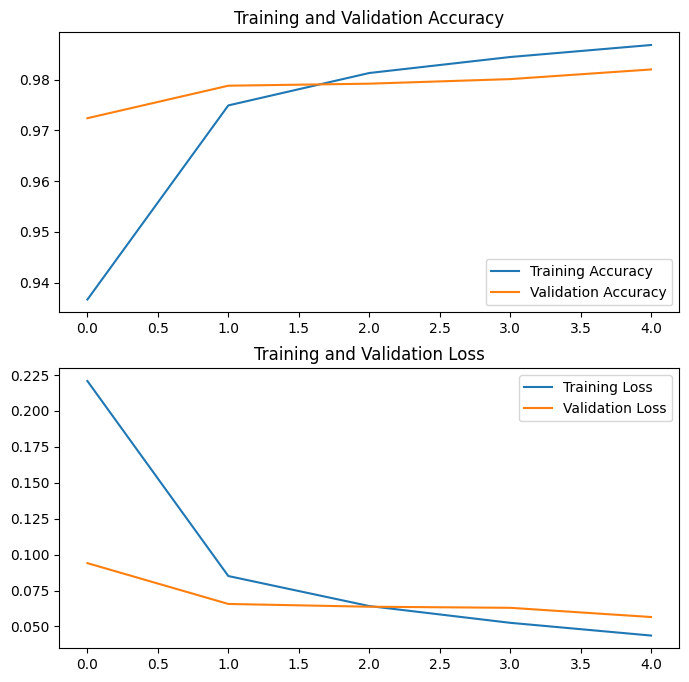

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()